# Titanic Project

In [60]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pylab as py

In [2]:
df=pd.read_csv('titanic_train.csv')

### Getting to know the data

In [3]:
df.head()
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  Survivors distribution according to Pclass

In [4]:
df.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

###  Survivors distribution according to gender

In [5]:
df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

### Working with the agg function

In [6]:
# Checking some features simultaniously
df.agg({'Name':'count', 'Fare':'sum', 'Age':'mean'})

Name      891.000000
Fare    28693.949300
Age        29.699118
dtype: float64

### Preliminiary visualizations

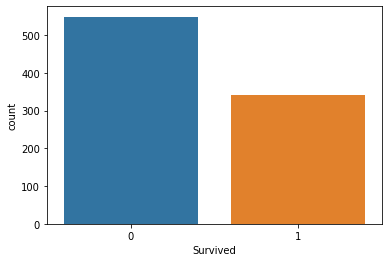

In [7]:
sb.countplot(x='Survived' ,data=df)
#sb.countplot(x='Sex' ,data=df)
#sb.countplot(x='Survived',hue='Sex' ,data=df)
#sb.countplot(x='Sex',hue='Survived' ,data=df)
#sb.catplot(x='Survived',hue='Sex',data=df,col='Pclass',kind='count')

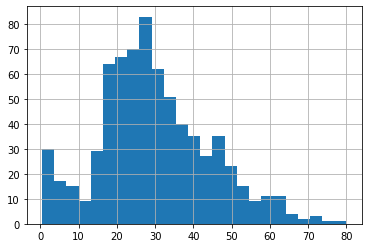

In [8]:
#sb.distplot(df['Age'].dropna())#,bins=25,kde=False)
df['Age'].hist(bins=25)
# distplot doesn't habdle missing values
# hist can handle missing values

### Age distribution of the survivors\casualties

Text(0.5, 1.0, 'Age dist of Survivors')

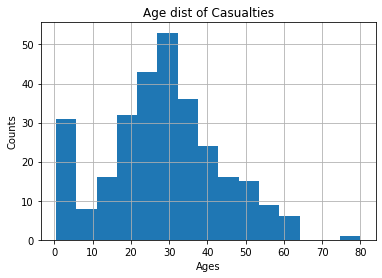

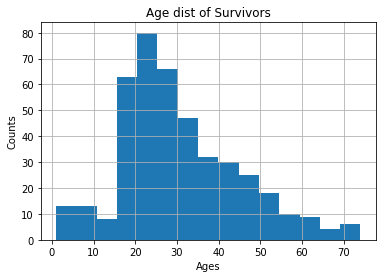

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig = df[df['Survived']==1]['Age'].hist(bins=15)
ax.set_xlabel("Ages")
ax.set_ylabel("Counts")
ax.set_title("Age dist of Casualties")

fig = plt.figure()
ax = fig.add_subplot(111)
fig = df[df['Survived']==0]['Age'].hist(bins=15)
ax.set_xlabel("Ages")
ax.set_ylabel("Counts")
ax.set_title("Age dist of Survivors")

Calculating mean and median of the survivors\casualties

In [11]:
df[df['Survived']==0]['Age'].mean(), df[df['Survived']==0]['Age'].median()
#df[df['Survived']==1]['Age'].mean(), df[df['Survived']==1]['Age'].median()

(30.62617924528302, 28.0)

## Logistic Regression Classification 1 - No missing values, no categorical features

In [12]:
import sklearn.linear_model as sklin

In [13]:
LR = sklin.LogisticRegression()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
round(df.isnull().sum()/len(df)*100)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

### For the moment -  we ignore missing values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass','Fare']], 
                                                    df['Survived'], test_size=0.33, random_state=42)

In [18]:
LR.fit(X_train,y_train)

LogisticRegression()

In [19]:
pred = LR.predict(X_test)

In [20]:
import sklearn.metrics as skmet

### 1st estimation - Pclass & Fare features only

In [21]:
skmet.confusion_matrix(y_test,pred)

array([[150,  25],
       [ 64,  56]], dtype=int64)

In [22]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       175
           1       0.69      0.47      0.56       120

    accuracy                           0.70       295
   macro avg       0.70      0.66      0.66       295
weighted avg       0.70      0.70      0.68       295



### Now we add categorical features

still don't touch the missing values

In [23]:
# I chose to create a new dataframe
df2 = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [24]:
df2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [25]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_male'],
      dtype='object')

In [26]:
# Taking the features containing no missing values
X_train, X_test, y_train, y_test = train_test_split(df2[['Pclass','Fare','Sex_male','SibSp','Parch']], df2['Survived'], test_size=0.33, random_state=42)

In [27]:
df2[['Pclass','Fare','Sex_male','SibSp','Parch']].head()

,Pclass,Fare,Sex_male,SibSp,Parch
0,3,7.2500,1,1,0
1,1,71.2833,0,1,0
2,3,7.9250,0,0,0
3,1,53.1000,0,1,0
4,3,8.0500,1,0,0


In [28]:
LR.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred = LR.predict(X_test)

### 2nd estimation - Pclass, Fare and Sex features

In [33]:
skmet.confusion_matrix(y_test,pred)

array([[153,  22],
       [ 37,  83]], dtype=int64)

In [34]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       175
           1       0.79      0.69      0.74       120

    accuracy                           0.80       295
   macro avg       0.80      0.78      0.79       295
weighted avg       0.80      0.80      0.80       295



In [35]:
# At least 10% improvement in the statistical parameters !

### What about the missing values in Age and Cabbin?

First, let's see how much do we have from each

In [36]:
round(df.isnull().sum()/len(df)*100)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

We can try to save Sex (20%) but the story with Cabin is over (!!70%)

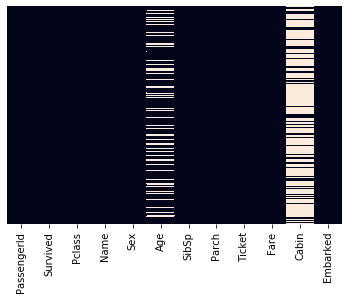

In [37]:
# This is how it looks - 
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

### Let's see if we can fix Age missing values

In [38]:
# We could try to complete the Age just by adding the total average or median.
# The problem is that it's not accurate. The more accurate we are, the more realistic the model is.
# So, we try to choose a category which separates nicely the median Age (more 'stable' than mean)

(37.0, 29.0, 24.0)

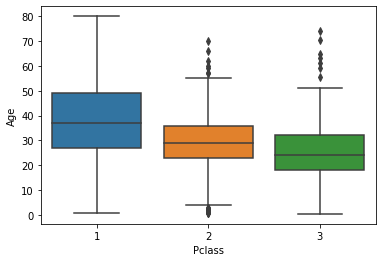

In [39]:
sb.boxplot(y='Age',x='Pclass' ,data=df2)
df2[df2.Pclass == 1].Age.median(),df2[df2.Pclass == 2].Age.median(),df2[df2.Pclass == 3].Age.median()

Now we wish to complete the missing values according to the separation above

In [40]:
for k,v in df2.iterrows():
    ls=[0,37,29,24]
    if np.isnan(v.Age):
        df2.loc[k,'Age'] = ls[v.Pclass]

In [41]:
df2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [42]:
# We drop cabin feature
df2.drop('Cabin',axis=1,inplace=True)

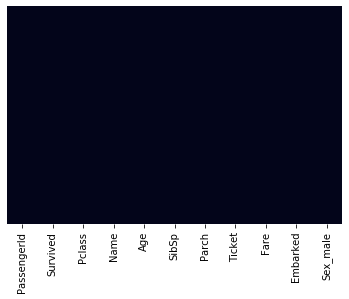

In [43]:
# Now we are clean from missing values
sb.heatmap(df2.isnull(),yticklabels=False,cbar=False)

In [44]:
df2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


In [45]:
# If we wish to create a copy, this is the place
df2.drop(['PassengerId','Embarked','Ticket','Name'],axis=1,inplace=True)
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


Let's add the Embarked feature from the original dataframe

In [46]:
emb=pd.get_dummies(df['Embarked'],drop_first=True)

In [47]:
df2 = pd.concat([df2,emb],axis=1)
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['Survived','Q','S','Fare'],axis=1),
                                                    df2['Survived'], test_size=0.33, random_state=42) 

In [49]:
LR.fit(X_train,y_train)

LogisticRegression()

In [50]:
pred = LR.predict(X_test)

In [52]:
skmet.confusion_matrix(y_test,pred)

array([[159,  16],
       [ 31,  89]], dtype=int64)

In [53]:
print(skmet.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       175
           1       0.85      0.74      0.79       120

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.84      0.84      0.84       295



#### This is definitely the best result we got!

In [59]:
# We played a bit with the features - the best result is achieved when we drop 'Embarked' and 'Fare' features.
# In addition, it also depend which statistical parameter we want to maximize (business requirements)